WEEK-07: LOGISTIC REGRESSION USING STOCHASTIC GRADIENT DESCENT

In [53]:
import pandas as pd
import numpy as np
from math import e, sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDRegressor as SGR
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

1. Create the following data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.

Apply the Logistic Regression to perform the following.

a. Calculate the coefficients (B0, B1 and B2).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error and B2 v/s error.

f. Use scikit learn model to repeat the above steps and compare the results.

In [2]:
df = pd.read_csv('/home/AIML_Student/Documents/B34_aiml/Lab7/dataset.csv')
d = df.to_numpy()
df

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242070,1
9,7.673756,3.508563,1


In [3]:
df.describe()

,X1,X2,Y
count,10.000000,10.000000,10.000000
mean,4.832702,2.405393,0.500000
std,2.746105,1.225863,0.527046
min,1.388070,-0.242070,0.000000
25%,2.851831,1.909822,0.000000
50%,4.364502,2.456331,0.500000
75%,7.451297,2.943795,1.000000
max,8.675419,4.400294,1.000000


In [4]:
x = d[:,:-1] #every column except the last one
print(x.shape)
x

(10, 2)


array([[ 2.781084,  2.550537],
       [ 1.465489,  2.362125],
       [ 3.396562,  4.400294],
       [ 1.38807 ,  1.85022 ],
       [ 3.064072,  3.005306],
       [ 7.627531,  2.759262],
       [ 5.332441,  2.088627],
       [ 6.922597,  1.771064],
       [ 8.675419, -0.24207 ],
       [ 7.673756,  3.508563]])

In [5]:
y = d[:, -1] #last column
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3) 

In [7]:
model = LR().fit(x_train, y_train)

In [8]:
y_pred = model.predict(x_test)

In [9]:
print(confusion_matrix(y_test, y_pred))

[[1 0]
 [0 2]]


In [10]:
print(y_test.shape, y_pred.shape)

(3,) (3,)


In [11]:
model.score(x_test, y_pred)

1.0

In [12]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00         1\n         1.0       1.00      1.00      1.00         2\n\n    accuracy                           1.00         3\n   macro avg       1.00      1.00      1.00         3\nweighted avg       1.00      1.00      1.00         3\n'

In [13]:
y_test

array([1., 0., 1.])

In [14]:
y_pred

array([1., 0., 1.])

a. Calculate the coefficients (B0, B1 and B2).

In [15]:
b0 = model.intercept_
b12 = model.coef_
print(b12.shape)
print("coefs: {}, {}".format(b12[0][0], b12[0][1]))
print(f"intercept: {b0}")

(1, 2)
coefs: 1.023936172217344, -0.2158032210710643
intercept: [-4.7436455]


In [16]:
x_train.shape

(7, 2)

In [17]:
x_train[:,0].size

7

b. Apply the sigmoid function to get the prediction and calculate error.

In [18]:
#implementing myself:

b0 = 0.0
b1 = 0.0
b2 = 0.0
a = 0.3 #alpha
y_pred2 = []
b0_vals = []
b1_vals = []
b2_vals = []
err = []


for i in range(0, x_train[:,0].size):
    x1 = x_train[i]
    y1 = y_train[i]
    
    y_pred_new = b1*x1[0] +b2*x1[1] + b0
    y_pred_new = 1 / (1 + e**(-y_pred_new))
    print(y_pred_new)
    y_pred2.append(y_pred_new)
    y_pred2[i] = int(np.where(y_pred2[i]>=0.5, 1,0))
    b0 = b0 + a*(y1- y_pred_new)*y_pred_new*(1-y_pred_new)
    b0_vals.append(b0)
    b1 = b1 + a*(y1- y_pred_new)*y_pred_new*(1-y_pred_new)*x1[0]
    b1_vals.append(b1)
    b2 = b2 + a*(y1- y_pred_new)*y_pred_new*(1-y_pred_new)*x1[1]
    b2_vals.append(b2)
    
    
    err1 = y_pred_new - y1
    err.append(err1)

print('predicted: ',y_pred2)
print('actual: ',y_train)

0.5
0.37294421275453493
0.1715326471575502
0.453042929542292
0.4709915167035398
0.8384956549598112
0.5035659525311219
predicted:  [1, 0, 0, 0, 0, 1, 1]
actual:  [0. 0. 1. 0. 1. 1. 0.]


In [19]:
#sigmoid function: y = 1 / (1 + e^-x)
y_pred_new = b12[0][0]*x_test[:,0] +b12[0][1]*x_test[:,1] + b0

y_pred1 = 1/(1+ (e**(-y_pred_new)))

print(y_pred_new.shape,y_pred1.shape)

(3,) (3,)


In [20]:
print(y_pred1)
y_pred1 = np.where(y_pred1>0.5, 1,0)
print(y_pred1)
print(y_test)

[0.99922429 0.91947047 0.99300584]
[1 1 1]
[1. 0. 1.]


In [21]:
mse = mean_squared_error(y_test, y_pred1)
rmse = sqrt(mse)
print(f"rmse: {rmse}")

rmse: 0.5773502691896257


c. From the predicted values calculate the accuracy.

In [22]:
cmat = confusion_matrix(y_test, y_pred1)
print(cmat)

TP = cmat[0][0]
TN = cmat[1][1]

[[0 1]
 [0 2]]


In [23]:
#accuracy = (number of correct predictions)/(total number of predictions) 
acc = (TP.size+TN.size)/y_pred1.size
print(acc)

0.6666666666666666


d. List the model parameters along with error for every instance of the training data.

In [24]:
for i in range(x_train[:,0].size):
    print(f"coefs: b0: {b0_vals[i]}, b1: {b1_vals[i]}, b2: {b2_vals[i]}")
    print("error: ", err[i])

coefs: b0: -0.0375, b1: -0.127371075, b2: -0.16501102499999998
error:  0.5
coefs: b0: -0.06366466506471774, b1: -0.16368946163638276, b2: -0.21342141159604205
error:  0.37294421275453493
coefs: b0: -0.028344815711232596, b1: 0.08081562153850544, b2: -0.15086769792066124
error:  -0.8284673528424498
coefs: b0: -0.06202335208671881, b1: -0.01284721711877726, b2: -0.2367660510521847
error:  0.453042929542292
coefs: b0: -0.022481262777844034, b1: 0.33019697577113183, b2: -0.24633800461118402
error:  -0.5290084832964602
coefs: b0: -0.015919953748612083, b1: 0.3805468603020547, b2: -0.22331723851965488
error:  -0.16150434504018885
coefs: b0: -0.0536854791824137, b1: 0.3252018981995982, b2: -0.3125241302849735
error:  0.5035659525311219


e. Plot the graph of B1 v/s error and B2 v/s error.

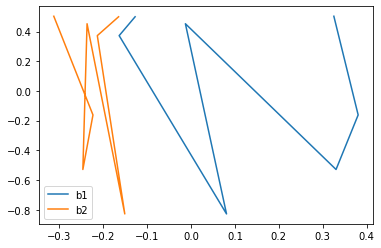

In [25]:
plt.plot(b1_vals, err, label = 'b1')
plt.plot(b2_vals, err, label = 'b2')
plt.legend()
plt.show()

f. Use scikit learn model to repeat the above steps and compare the results.

In [26]:
mse2 =mean_squared_error(y_train, y_pred2)
rmse2 = sqrt(mse2)
print(rmse2)

0.7559289460184544


In [27]:
print('Using scikit rmse: ', rmse)
print('without scikit rmse: ', rmse2)

Using scikit rmse:  0.5773502691896257
without scikit rmse:  0.7559289460184544


2. Use above data set for one independent variable (X=X1) and one dependent variable (Y) in CSV.
Applying Logistic Regression, explore the relationship between independent and dependent variables.

a. Calculate the coefficients (B0, and B1).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.e. Plot the graph of B1 v/s error.

f. Visualize the following binary cross entropy function for logistic regression using the above training data

Plot y=1 and y=0 cases separately, and then plot the combined graph by considering X in X-axis and cost in Y-axis.

g. Use scikit learn model to repeat the above steps and compare the results.

In [47]:
x = d[:, 1].reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3) 

In [29]:
model = LR().fit(x,y)

a. Calculate the coefficients (B0, and B1).

In [30]:
b0m = model.intercept_
b0m

array([1.28308192])

In [31]:
b1m = model.coef_
b1m

array([[-0.5293715]])

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(rmse)

0.5773502691896257


b. Apply the sigmoid function to get the prediction and calculate error.

In [33]:
#sigmoid function: y = 1 / (1 + e^-x)

b0 = 0.0
b1 = 0.0
a = 0.3 #alpha
y_pred2 = []
b0_vals = []
b1_vals = []
err = []


for i in range(0, x_train[:,0].size):
    x1 = x_train[i]
    y1 = y_train[i]
    
    y_pred_new = b1*x1[0] + b0
    y_pred_new = 1 / (1 + e**(-y_pred_new))
    y_pred2.append(y_pred_new)
    
    y_pred2[i] = int(np.where(y_pred2[i]>=0.5, 1,0))
    b0 = b0 + a*(y1- y_pred_new)*y_pred_new*(1-y_pred_new)
    b0_vals.append(b0)
    b1 = b1 + a*(y1- y_pred_new)*y_pred_new*(1-y_pred_new)*x1[0]
    b1_vals.append(b1)
    
    err1 = y_pred_new - y1
    err.append(err1)

print('predicted: ',y_pred2)
print('actual: ',y_train)

predicted:  [1, 1, 0, 0, 0, 0, 0]
actual:  [1. 0. 0. 1. 0. 1. 1.]


c. From the predicted values calculate the accuracy.

In [34]:
cmat = confusion_matrix(y_train, y_pred2)
print(cmat)

TP = cmat[0][0]
TN = cmat[1][1]
print(TP, TN)

[[2 1]
 [3 1]]
2 1


In [35]:
acc = (TN+TP)/len(y_pred2)
print(acc)

0.42857142857142855


d. List the model parameters along with error for every instance of the training data.

In [36]:
for i in range(len(y_pred2)):
    print('\nItr: ', i)
    print(f"coefs: b0: {b0_vals[i]}, b1: {b1_vals[i]}")
    print("error: ", err[i])


Itr:  0
coefs: b0: 0.0375, b1: -0.009077625
error:  -0.5

Itr:  1
coefs: b0: -0.00019061982681451567, b1: -0.12234947090924463
error:  0.5025547175486588

Itr:  2
coefs: b0: -0.025918600949008514, b1: -0.23556015187334814
error:  0.3685216345429813

Itr:  3
coefs: b0: 0.018064899936104068, b1: -0.14369502437017811
error:  -0.6266603036948912

Itr:  4
coefs: b0: -0.012660781070199904, b1: -0.21627292361719389
error:  0.42034416835885036

Itr:  5
coefs: b0: 0.03045339587054728, b1: -0.13991495694780642
error:  -0.5976526519672121

Itr:  6
coefs: b0: 0.07408373266291152, b1: 0.01316482839942143
error:  -0.6131202223328452


e. Plot the graph of B1 v/s error.

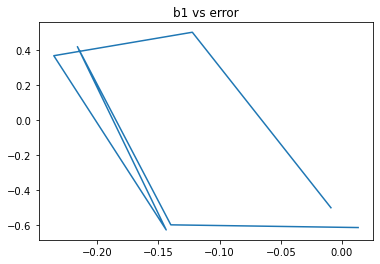

In [37]:
plt.plot(b1_vals, err)
plt.title('b1 vs error')
plt.show()

In [38]:
mse2 =mean_squared_error(y_train, y_pred2)
rmse2 = sqrt(mse2)
print(rmse2)

0.7559289460184544


g. Use scikit learn model to repeat the above steps and compare the results.

In [39]:
print('Using scikit rmse: ', rmse)
print('without scikit rmse: ', rmse2)

Using scikit rmse:  0.5773502691896257
without scikit rmse:  0.7559289460184544


3. Use the above data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.
Apply the Logistic Regression with SGD to perform the following.
a. Calculate the coefficients (B0, B1 and B2) and arrive at different values of B0, B1, B2, and error 
b. Apply the sigmoid function to get the prediction and calculate error.
c. From the predicted values calculate the accuracy.
d. Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).
f. Use scikit learn model to repeat the above steps and compare the results.

In [48]:
x = d[:, :-1].reshape(-1, 2)
y = d[:,-1].reshape(-1,1)

print(x.shape, y.shape)
print(x)

(10, 2) (10, 1)
[[ 2.781084  2.550537]
 [ 1.465489  2.362125]
 [ 3.396562  4.400294]
 [ 1.38807   1.85022 ]
 [ 3.064072  3.005306]
 [ 7.627531  2.759262]
 [ 5.332441  2.088627]
 [ 6.922597  1.771064]
 [ 8.675419 -0.24207 ]
 [ 7.673756  3.508563]]


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3) 

In [54]:
model = SGR().fit(x,y.ravel())

In [55]:
b0 = model.intercept_
b0

array([-0.01052288])

In [57]:
b1 = model.coef_
b1

array([ 0.13971234, -0.05559112])

In [64]:
y_pred = model.predict(x_test)
print(y_pred)

y_pred = 1/(1+e**y_pred)
y_pred = np.where(y_pred>0.5, 1, 0)
print(y_pred)

[0.23624169 0.25049749 0.06291086]
[0 0 0]


In [65]:
mse = mean_squared_error(y_pred, y_test)
rmse = sqrt(mse)
print("rmse: ", rmse)

rmse:  0.0


In [66]:
from sklearn.metrics import accuracy_score

In [67]:
score = accuracy_score(y_test, y_pred)  
print(score)  

1.0
